In [1]:
import  numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim

def buildAndTrainTheModel(x,y,numepochs=500):

    ANNreg = nn.Sequential(
        nn.Linear(1,1),  
        nn.ReLU(),
        nn.Linear(1,1)   
    )

    lossfun = nn.MSELoss()
    optimizer = optim.SGD(ANNreg.parameters(), lr=0.01)
    losses=torch.zeros(numepochs)

    # training loop
    for epochi in range(numepochs):
        # forward
        yHat = ANNreg(x)
        loss = lossfun(yHat,y)
        losses[epochi]=loss
    
        # backprop
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # compute final test loss (mean squared error)
    predictions = ANNreg(x)

    return predictions, losses




A function that creates the data

In [3]:
def createTheData(m):
    N=50
    x=torch.randn(N,1)
    y=m*x+torch.randn(N,1)/2
    return x,y

Testing once

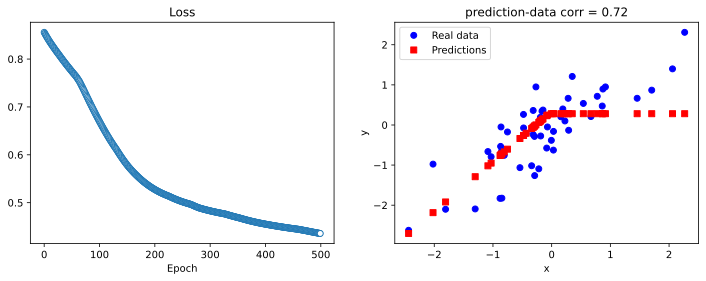

In [5]:
# create a dataset
x,y = createTheData(.8)

# run the model
predictions,losses = buildAndTrainTheModel(x,y)
predictions = predictions.detach()

fig,ax = plt.subplots(1,2,figsize=(12,4))

ax[0].plot(losses.detach(),'o',markerfacecolor='w',linewidth=.1)
ax[0].set_xlabel('Epoch')
ax[0].set_title('Loss')

ax[1].plot(x,y,'bo',label='Real data')
ax[1].plot(x,predictions.detach(),'rs',label='Predictions')
ax[1].set_xlabel('x')
ax[1].set_ylabel('y')
ax[1].set_title(f'prediction-data corr = {np.corrcoef(y.T,predictions.detach().T)[0,1]:.2f}')
ax[1].legend()

plt.show()

In [8]:
# the slopes to simulate
slopes = np.linspace(-2,2,21)

numExps = 50

# initialize output matrix
results = np.zeros((len(slopes),numExps,2))

for slopei in range(len(slopes)):

  for N in range(numExps):

    # create a dataset and run the model
    x,y = createTheData(slopes[slopei])
    predictions,losses = buildAndTrainTheModel(x,y)
    predictions = predictions.detach()

    # store the final loss and performance
    results[slopei,N,0] = losses[-1]
    results[slopei,N,1] = np.corrcoef(y.T,predictions.T)[0,1]


# correlation can be 0 if the model didn't do well. Set nan's->0
results[np.isnan(results)] = 0

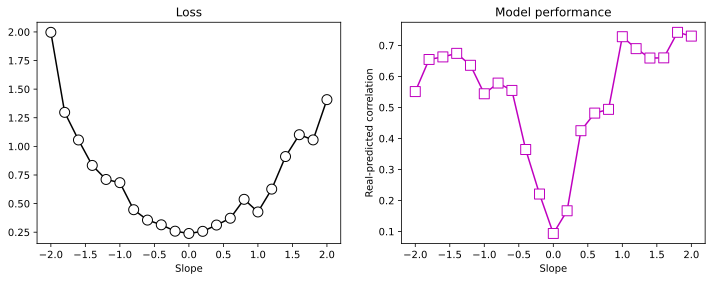

In [11]:
# plot the results!

fig,ax = plt.subplots(1,2,figsize=(12,4))

ax[0].plot(slopes,np.mean(results[:,:,0],axis=1),'ko-',markerfacecolor='w',markersize=10)
ax[0].set_xlabel('Slope')
ax[0].set_title('Loss')

ax[1].plot(slopes,np.mean(results[:,:,1],axis=1),'ms-',markerfacecolor='w',markersize=10)
ax[1].set_xlabel('Slope')
ax[1].set_ylabel('Real-predicted correlation')
ax[1].set_title('Model performance')

plt.show()
     